In [1]:
from google.colab import files
uploaded=files.upload()


Saving sales_capstone_data.csv to sales_capstone_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('sales_capstone_data.csv')

In [ ]:
df.head()

,Order_ID,Order_Date,Product,City,Quantity,Revenue
0,1001,2023-01-01,Monitor,Chennai,4,45262
1,1002,2023-01-02,Headphones,Chennai,1,126117
2,1003,2023-01-03,Keyboard,Chennai,4,24776
3,1004,2023-01-04,Headphones,Hyderabad,2,129376
4,1005,2023-01-05,Headphones,Bangalore,1,138848


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order_ID    50 non-null     int64 
 1   Order_Date  50 non-null     object
 2   Product     50 non-null     object
 3   City        50 non-null     object
 4   Quantity    50 non-null     int64 
 5   Revenue     50 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


Which product generated the most revenue?

In [11]:
df.groupby('Product')['Revenue'].sum().idxmax()

'Monitor'

Which city had the highest sales?

In [18]:
df.groupby('City')['Revenue'].sum().sort_values(ascending=False)

,Revenue
City,
Chennai,1330443
Delhi,820509
Mumbai,795062
Bangalore,618154
Hyderabad,577628


What are daily/weekly trends in revenue?

In [5]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

daily_revenu

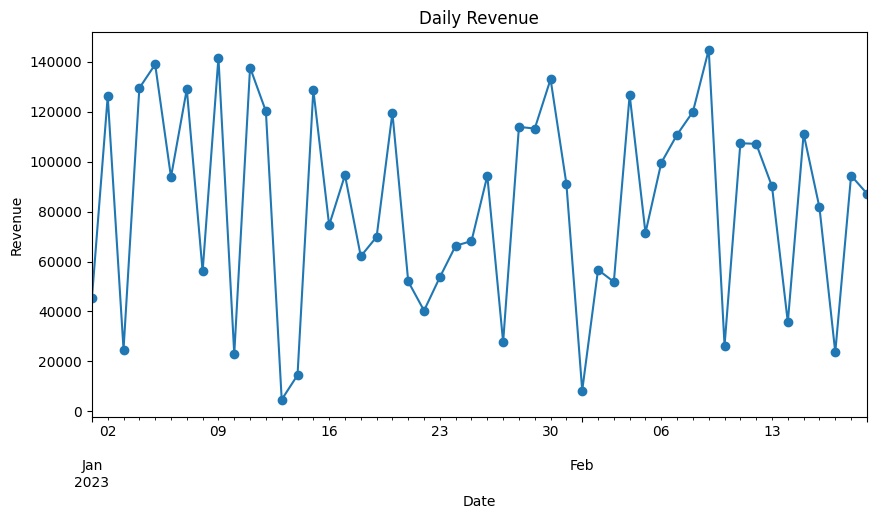

In [6]:
daily_rev=df.groupby('Order_Date')['Revenue'].sum()

daily_rev.plot(kind='line',marker='o',title='Daily Revenue',figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

Weekly bases revenue

In [9]:
df['Week']=df['Order_Date'].dt.to_period("W").astype(str)

In [10]:
df.head()


,Order_ID,Order_Date,Product,City,Quantity,Revenue,Week
0,1001,2023-01-01,Monitor,Chennai,4,45262,2022-12-26/2023-01-01
1,1002,2023-01-02,Headphones,Chennai,1,126117,2023-01-02/2023-01-08
2,1003,2023-01-03,Keyboard,Chennai,4,24776,2023-01-02/2023-01-08
3,1004,2023-01-04,Headphones,Hyderabad,2,129376,2023-01-02/2023-01-08
4,1005,2023-01-05,Headphones,Bangalore,1,138848,2023-01-02/2023-01-08


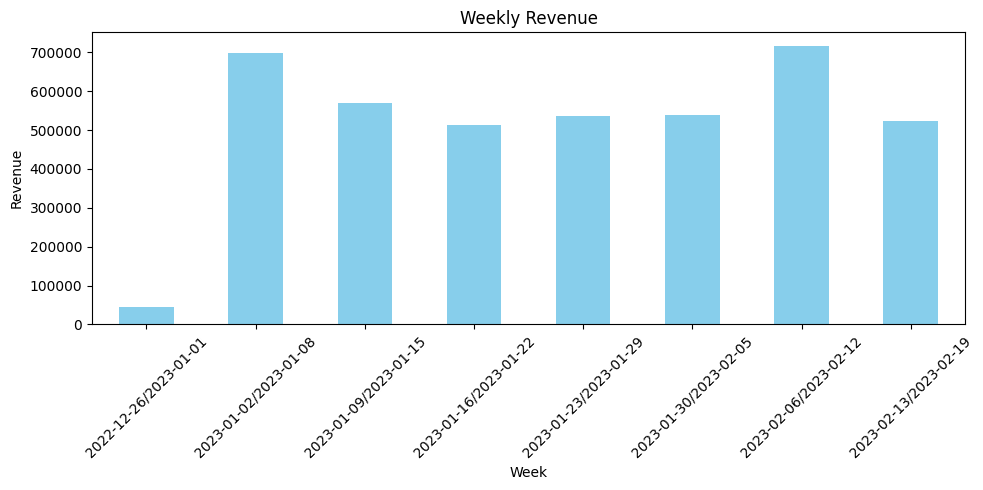

In [11]:
week_rev=df.groupby('Week')['Revenue'].sum()

#plot
week_rev.plot(kind='bar',title='Weekly Revenue',figsize=(10,5),color='skyblue')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average revenue per product?

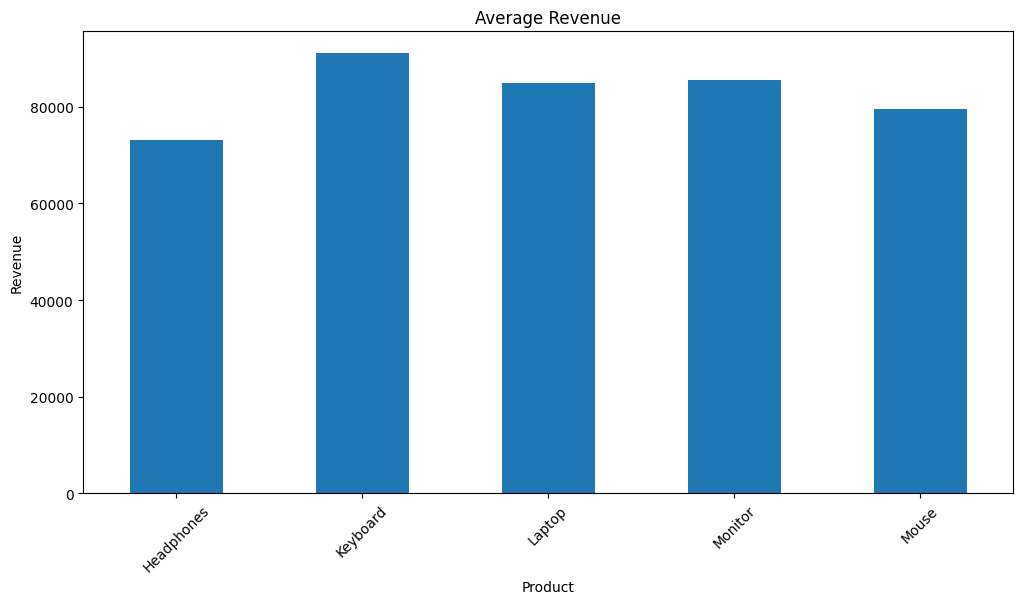

In [12]:
avg_reven=df.groupby('Product')['Revenue'].mean()

#plot
avg_reven.plot(kind='bar',title="Average Revenue",figsize=(12,6))
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

Quantity vs. Revenue relationship?

In [13]:
correlation = df["Quantity"].corr(df["Revenue"])
print(f"Correlation between Quantity and Revenue: {correlation}")


Correlation between Quantity and Revenue: -0.25787511487291964


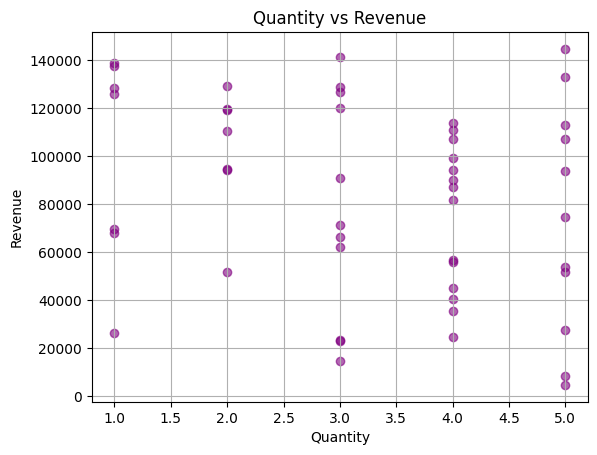

In [14]:

plt.scatter(df["Quantity"], df["Revenue"], color="purple", alpha=0.6)
plt.title("Quantity vs Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


🔹 1. Top Insights Using GroupBy:

In [54]:
# Top city by revenue
df.groupby("City")["Revenue"].sum().sort_values(ascending=False)

,Revenue
City,
Chennai,1330443
Delhi,820509
Mumbai,795062
Bangalore,618154
Hyderabad,577628


In [55]:
# Top product by revenue
df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

,Revenue
Product,
Monitor,1111068
Keyboard,910634
Mouse,795236
Headphones,730377
Laptop,594481


In [56]:
# Average revenue per product
df.groupby("Product")["Revenue"].mean()

,Revenue
Product,
Headphones,73037.700000
Keyboard,91063.400000
Laptop,84925.857143
Monitor,85466.769231
Mouse,79523.600000


In [58]:
# Quantity sold per city
df.groupby("City")["Quantity"].sum()

,Quantity
City,
Bangalore,19
Chennai,42
Delhi,42
Hyderabad,33
Mumbai,29


🔹 2. Visualizations for These Insights

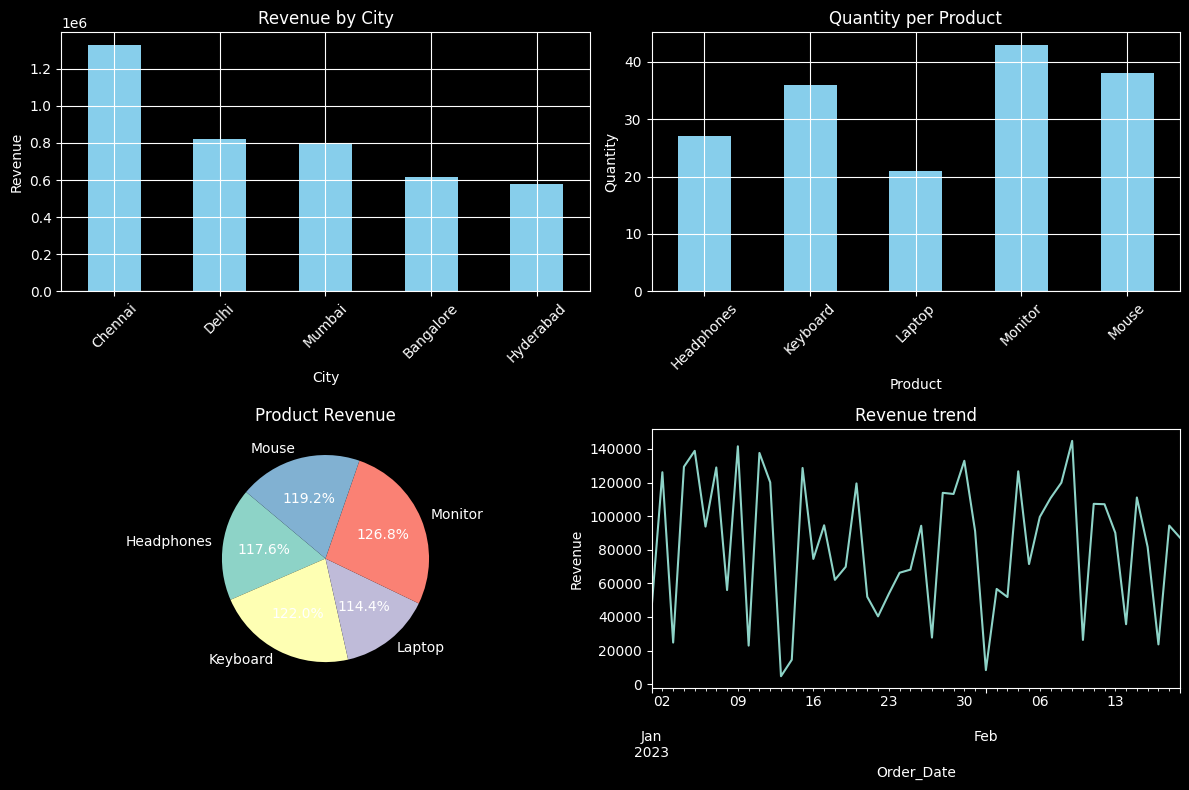

In [60]:
plt.figure(figsize=(12,8))

top_city=df.groupby("City")["Revenue"].sum().sort_values(ascending=False)
plt.subplot(2,2,1)
top_city.plot(kind="bar", title="Revenue by City", color="skyblue")
plt.ylabel("Revenue")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.grid(True)
# plt.tight_layout()
# plt.show()

plt.subplot(2,2,2)
quanty_prodcut=df.groupby('Product')['Quantity'].sum()
quanty_prodcut.plot(kind="bar", title="Quantity per Product", color="skyblue")
plt.ylabel("Quantity")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.grid(True)
# plt.tight_layout()
# plt.show()

plt.subplot(2,2,3)
top_product=df.groupby('Product')['Revenue'].sum()
top_product.plot(kind='pie',title='Product Revenue',autopct='1%.1f%%',startangle=140)
# plt.tight_layout()
plt.ylabel("")
# plt.show()

plt.subplot(2,2,4)
revn_trend=df.groupby('Order_Date')['Revenue'].sum()
revn_trend.plot(kind='line',title='Revenue trend')
plt.ylabel('Revenue')

plt.savefig("sales_dashboard.png")
plt.tight_layout()
plt.show()